<a href="https://colab.research.google.com/github/Shreyas1608/sk/blob/main/Copy_of_Cat_Dog_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  EDUNET FOUNDATION - Classroom Exercise Notebook

# Lab 2 - Cat-Dog Classification using CNN

In [ ]:
!rm -r cats_and_dogs_filtered
!rm -r cats_and_dogs_filtered.zip

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [36]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [37]:
PATH="./cats_and_dogs_filtered"

In [38]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [39]:
print(train_dir)

./cats_and_dogs_filtered/train


In [40]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [41]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [42]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [43]:
batch_size = 32
epochs = 35
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [44]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [45]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
train_data_gen

Found 2000 images belonging to 2 classes.


In [46]:
train_data_gen[0][0].shape

(32, 200, 200, 3)

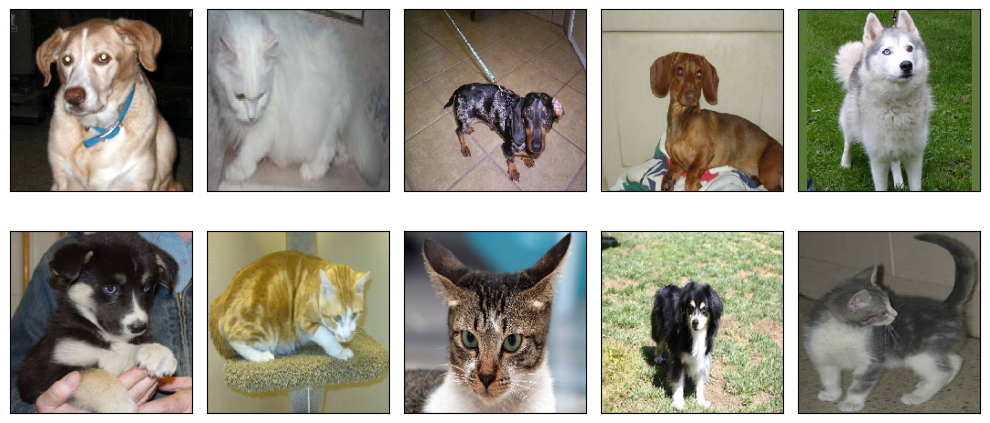

In [47]:
plt.figure(figsize=(10, 5))
for wind, img in enumerate(train_data_gen[0][0][:10], start=1):
    plt.subplot(2, 5, wind)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.tight_layout()

Found 1000 images belonging to 2 classes.


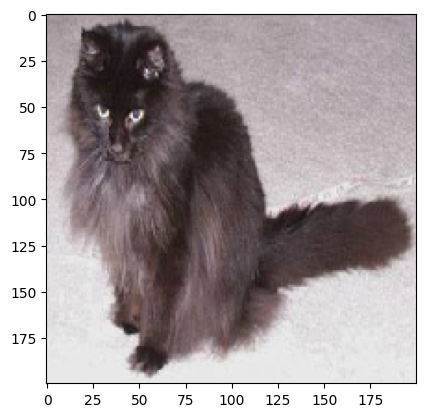

In [48]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')
plt.imshow(val_data_gen[0][0][0])

In [49]:
sample_training_images, _ = next(train_data_gen)
sample_training_images.shape

(32, 200, 200, 3)

In [50]:
model1 = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    20,480,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,504,609 (78.22 MB)

 Trainable params: 20,504,609 (78.22 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model2 = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

In [52]:
model=model1

In [53]:
import tensorflow as tf
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    20,480,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,504,609 (78.22 MB)

 Trainable params: 20,504,609 (78.22 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
model.save('model.h5')

Epoch 1/35


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:789: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


62/62 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.4996 - loss: 1.4376 - val_accuracy: 0.6431 - val_loss: 0.6719
Epoch 2/35
 1/62 ━━━━━━━━━━━━━━━━━━━━ 2:21 2s/step - accuracy: 0.6562 - loss: 0.6744

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 295ms/step - accuracy: 0.6562 - loss: 0.6744 - val_accuracy: 0.6462 - val_loss: 0.6696
Epoch 3/35
62/62 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.6386 - loss: 0.6539 - val_accuracy: 0.6855 - val_loss: 0.5971
Epoch 4/35
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 211ms/step - accuracy: 0.6250 - loss: 0.5813 - val_accuracy: 0.6341 - val_loss: 0.6100
Epoch 5/35
62/62 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.6817 - loss: 0.5827 - val_accuracy: 0.7016 - val_loss: 0.5839
Epoch 6/35
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step - accuracy: 0.8438 - loss: 0.4159 - val_accuracy: 0.6996 - val_loss: 0.5819
Epoch 7/35
62/62 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.7518 - loss: 0.5095 - val_accuracy: 0.7026 - val_loss: 0.6054
Epoch 8/35
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.7812 - loss: 0.4118 - val_accuracy: 0.6956 - val_loss: 0.6063
Epoch 9/35
62/62 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8186 - loss: 0.4277 - val_accuracy: 0.6583 - val_

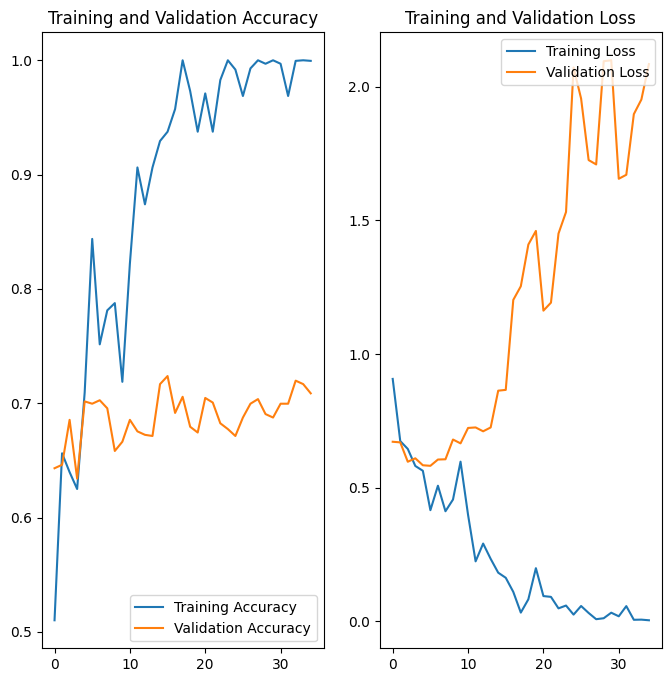

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
from keras.models import load_model

import cv2

import numpy as np


img = cv2.imread('/content/download.jpg')


img = cv2.resize(img,(200,200))

img = np.reshape(img,[1,200,200,3])
preddicted_class = model.predict(img)
prerdicted_class = np.argmax(preddicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


In [61]:
model.predict()

TypeError: TensorFlowTrainer.predict() missing 1 required positional argument: 'x'

In [62]:
from keras.models import load_model

import cv2

import numpy as np


img = cv2.imread('/content/images.jpg')


img = cv2.resize(img,(200,200))

img = np.reshape(img,[1,200,200,3])
preddicted_class = model.predict(img)
prerdicted_class = np.argmax(preddicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [63]:
img2 = cv2.imread('/content/download.jpg')


img2 = cv2.resize(img,(200,200))

img2 = np.reshape(img,[1,200,200,3])
preddicted_class = model.predict(img2)
prerdicted_class = np.argmax(preddicted_class)

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:3845: error: (-215:Assertion failed) !dsize.empty() in function 'resize'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')